# Homework 6

In [1]:
#Importing libraries.
import numpy as np
import pandas as pd
import random
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

**Communities and Crime dataset from the UCI Machine Learning Repository**

**Dataset:**http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data

**Description of Dataset:** http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names

*The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR for the communities within the United States.*

*The attribute to be predicted (Per Capita Violent Crimes). The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units.*

In [4]:
# read in data, remove categorical features, remove rows with missing values
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [5]:
# examine the response variable
crime[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

In [6]:
# check the shape
crime.shape

(1994, 128)

In [7]:
# remove categorical features
crime = crime.iloc[:, 5:]

# remove rows with any missing values
crime.dropna(inplace=True)
crime.head()

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [8]:
# define X and y
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]

In [10]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Ridge Regression

In [13]:
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [14]:
rreg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [15]:
rreg.coef_
preds = rreg.predict(X_test)

In [16]:
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 =',np.sqrt(metrics.r2_score(y_test, preds)))

RMSE (Ridge reg.) = 0.164279068049
R2 = 0.730658875317


In [18]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(rreg.score(X_test, y_test)))

Variance score: 0.5338623920801915


### Kernel Ridge Regression

In [20]:
from sklearn.kernel_ridge import KernelRidge
clf=KernelRidge(alpha=1.5)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)

In [22]:
clf.get_params()

{'alpha': 1.5,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In [23]:
clf.fit(X_train,y_train)

KernelRidge(alpha=1.5, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [24]:
y_predicted = clf.predict(X_test)

In [25]:
print('RMSE (Kernel Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R2 (Kernel Ridge reg.) =',np.sqrt(metrics.r2_score(y_test, y_predicted)))

RMSE (Kernel Ridge reg.) = 0.183034364564
R2 (Kernel Ridge reg.) = 0.755413006652


In [26]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(clf.score(X_test, y_test)))

Variance score: 0.570648810618703


### Kernel Ridge Regression yielded a better model with higher R2 and lower Mean Squared Error and greater variance score as compared to Ridge Regression.

### SVM

**Pima Indian Diabetes dataset from the UCI Machine Learning Repository**

**Dataset:** https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

**Description of Dataset:**https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names

In [4]:
# read the data into a Pandas DataFrame
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['Pregnancies', 'GlucoseLevel', 'BloodPressure', 'SkinFoldThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunc', 'Age', 'Class']
pima = pd.read_csv(url, header=None, names=col_names)

In [5]:
# print the first 5 rows of data
pima.head()

,Pregnancies,GlucoseLevel,BloodPressure,SkinFoldThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima = pima[pima.Pregnancies != 0]
pima = pima[pima.GlucoseLevel != 0]
pima = pima[pima.SkinFoldThickness != 0]
pima = pima[pima.BMI != 0]
pima = pima[pima.Age != 0]
pima.head(5)

,Pregnancies,GlucoseLevel,BloodPressure,SkinFoldThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [8]:
from sklearn import svm
X = pima.iloc[:,1:3].values # we only take the first two features. We could
y=pima.iloc[:,8]
# avoid this ugly slicing by using a two-dim dataset

### Linear Kernel in SVM

In [12]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [13]:
svc.score(X,y)

0.77024070021881841

In [14]:
X[:,0]
X[:,1]
X[:, 0].min()

56

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
x_min

55

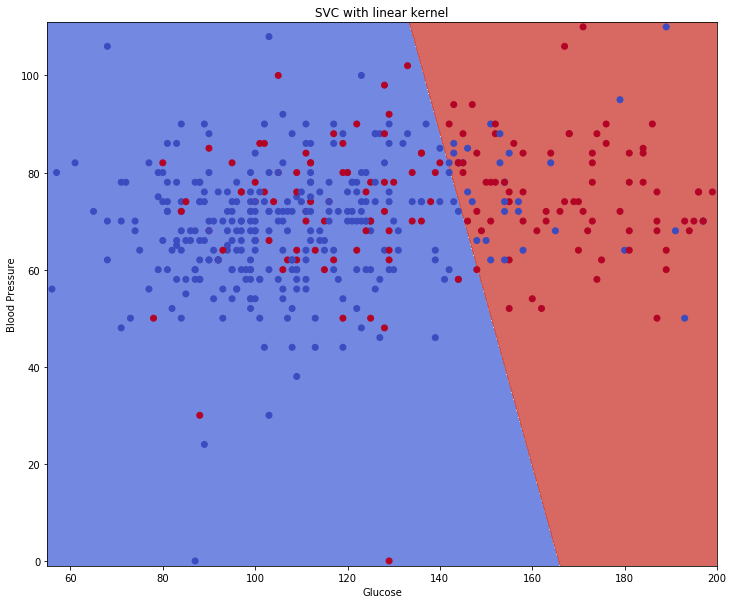

In [18]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### RBF Kernel in SVM

In [9]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

In [10]:
svc.score(X,y)

0.92778993435448576

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

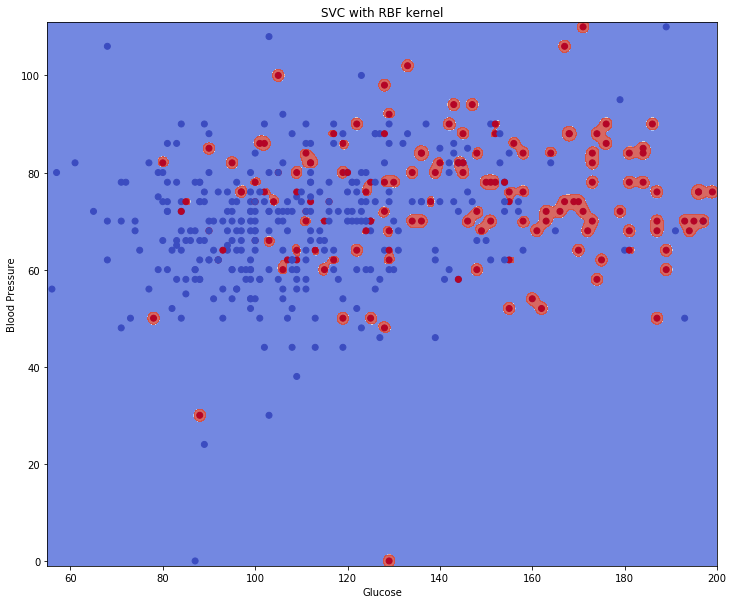

In [14]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

### Polynomial Kernel in SVM

In [15]:
svc = svm.SVC(kernel='poly', C=1,gamma='auto').fit(X, y)

In [16]:
svc.score(X,y)

0.75492341356673964

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
x_min

55

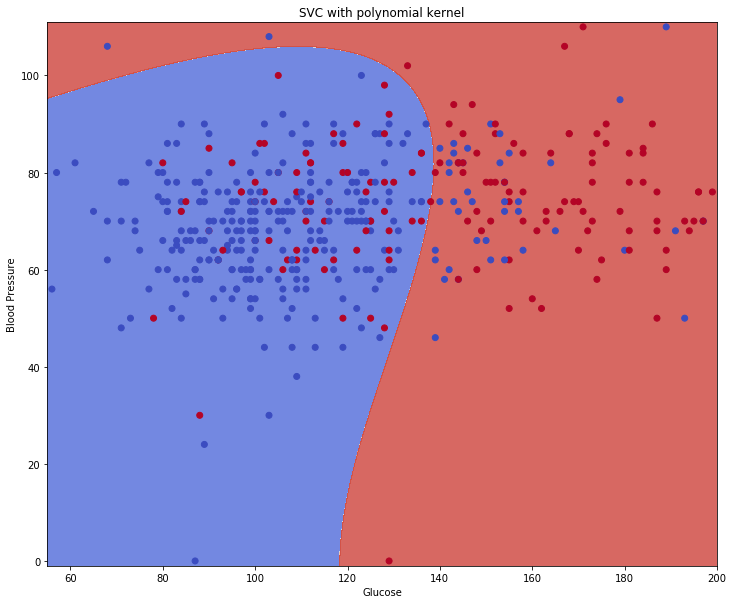

In [18]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')
plt.show()